# Wine Project

### Index
1.  [Exploratory Data Analysis](#1)<br>
2.  [Selecting Features for Classification Models](#2)<br>
3.  [Building and Evaluating Supervised Classification Models](#3)<br>
4.  [Balancing Data](#4)<br>
5.  [Model Evaluation and Comparison](#5)<br>
6.  [Hyperparameter Tuning](#6)<br>
7.  [Final Model Selection](#7)<br>
8.  [Interpretation of Results](#8)<br>



</div>

## 1: Exploratory Data Analysis<a id="1"></a>

In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [2]:
df_red = pd.read_csv('winequality-red.csv', sep=';', header=0).copy()
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df_white = pd.read_csv('winequality-white.csv', sep=';', header=0).copy()
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
df_red.shape

(1599, 12)

In [5]:
df_white.shape

(4898, 12)

In [6]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# Rename columns

df_red.rename(columns={
    'fixed acidity': 'fixed_acidity',
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid',
    'residual sugar': 'residual_sugar',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide'
}, inplace=True)


In [9]:
df_red.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
# Rename columns

df_white.rename(columns={
    'fixed acidity': 'fixed_acidity',
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid',
    'residual sugar': 'residual_sugar',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide'
}, inplace=True)

In [11]:
df_white.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
# Add wine type column

df_red["type"] = "red"
df_white["type"] = "white"


In [13]:
df_red.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [14]:
df_white.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [15]:
df_red.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [16]:
df_white.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [17]:
df_red.duplicated().sum()

240

In [18]:
# check for duplicates 

red_duplicates = df_red.duplicated()

df_filtered = df_red[red_duplicates]
df_filtered


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,red
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5,red
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5,red
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,red
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,red
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,red
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5,red


In [19]:
df_red = df_red.drop_duplicates().reset_index(drop=True)

In [20]:
df_red.shape

(1359, 13)

In [21]:
df_white.duplicated().sum()

937

In [22]:
# check for duplicates 

white_duplicates = df_white.duplicated()

df_filtered = df_white[white_duplicates]
df_filtered.head(50).T

,4,5,7,8,20,39,48,61,63,74,75,88,89,90,99,104,106,108,114,118,131,141,152,156,159,160,163,191,199,201,212,217,220,222,228,229,234,235,236,252,257,265,270,288,289,290,302,305,321,322
fixed_acidity,7.2,8.1,7.0,6.3,6.2,7.3,7.0,6.0,6.6,6.7,7.4,7.1,7.1,7.2,6.0,7.4,7.1,7.1,6.7,7.2,6.5,7.1,6.9,7.4,5.2,6.1,7.4,6.8,6.8,7.1,7.0,5.8,7.5,6.2,6.4,7.1,7.2,7.2,7.2,6.9,6.3,6.9,6.9,7.2,7.2,7.2,6.1,7.3,6.6,6.8
volatile_acidity,0.23,0.28,0.27,0.3,0.66,0.24,0.31,0.19,0.38,0.23,0.24,0.43,0.44,0.39,0.34,0.25,0.12,0.23,0.41,0.31,0.24,0.37,0.25,0.24,0.44,0.32,0.24,0.28,0.26,0.32,0.16,0.26,0.27,0.25,0.17,0.24,0.23,0.23,0.23,0.4,0.35,0.29,0.32,0.23,0.23,0.23,0.41,0.41,0.24,0.25
citric_acid,0.32,0.4,0.36,0.34,0.48,0.39,0.26,0.26,0.15,0.31,0.29,0.61,0.62,0.63,0.66,0.37,0.32,0.35,0.34,0.5,0.32,0.67,0.3,0.42,0.04,0.24,0.42,0.4,0.24,0.24,0.32,0.24,0.36,0.25,0.32,0.41,0.38,0.38,0.38,0.56,0.3,0.4,0.26,0.39,0.39,0.39,0.0,0.24,0.35,0.34
residual_sugar,8.5,6.9,20.7,1.6,1.2,17.95,7.4,12.4,4.6,2.1,10.1,11.8,11.8,11.0,15.9,13.5,9.6,16.5,9.2,13.3,7.6,10.5,4.1,14.0,1.4,1.5,14.0,22.0,7.8,13.1,8.3,9.2,7.0,1.4,2.4,17.8,14.3,14.3,14.3,11.2,5.7,19.45,8.3,14.2,14.2,14.2,1.6,6.8,7.7,4.7
chlorides,0.058,0.05,0.045,0.049,0.029,0.057,0.069,0.048,0.044,0.046,0.05,0.045,0.044,0.044,0.046,0.06,0.054,0.04,0.049,0.056,0.038,0.045,0.054,0.066,0.036,0.036,0.066,0.048,0.052,0.05,0.045,0.044,0.036,0.03,0.048,0.046,0.058,0.058,0.058,0.043,0.035,0.043,0.053,0.058,0.058,0.058,0.063,0.057,0.031,0.031
free_sulfur_dioxide,47.0,30.0,45.0,14.0,29.0,45.0,28.0,50.0,25.0,30.0,21.0,54.0,52.0,55.0,26.0,52.0,64.0,60.0,29.0,68.0,48.0,49.0,23.0,48.0,43.0,38.0,48.0,48.0,54.0,52.0,38.0,55.0,45.0,35.0,41.0,39.0,55.0,55.0,55.0,40.0,8.0,36.0,32.0,49.0,49.0,49.0,36.0,41.0,36.0,34.0
total_sulfur_dioxide,186.0,97.0,170.0,132.0,75.0,149.0,160.0,147.0,78.0,96.0,105.0,155.0,152.0,156.0,164.0,192.0,162.0,171.0,150.0,195.0,203.0,155.0,116.0,198.0,119.0,124.0,198.0,167.0,214.0,204.0,126.0,152.0,164.0,105.0,200.0,145.0,194.0,194.0,194.0,142.0,97.0,156.0,180.0,192.0,192.0,192.0,87.0,163.0,135.0,134.0
density,0.9956,0.9951,1.001,0.994,0.9892,0.9999,0.9954,0.9972,0.9931,0.9926,0.9962,0.9974,0.9975,0.9974,0.9979,0.9975,0.9962,0.999,0.9968,0.9982,0.9958,0.9975,0.994,0.9979,0.9894,0.9898,0.9979,1.001,0.9961,0.998,0.9958,0.9961,0.9939,0.9912,0.9938,0.9998,0.9979,0.9979,0.9979,0.9975,0.9927,0.9996,0.9965,0.9979,0.9979,0.9979,0.9914,0.9949,0.9938,0.9927
pH,3.19,3.26,3.0,3.3,3.33,3.21,3.13,3.3,3.11,3.33,3.13,3.11,3.12,3.09,3.14,3.0,3.4,3.16,3.22,3.01,3.45,3.16,2.99,2.89,3.36,3.29,2.89,2.93,3.13,3.1,3.21,3.31,3.03,3.3,3.5,3.32,3.09,3.09,3.09,3.14,3.27,2.93,3.25,2.98,2.98,2.98,3.27,3.2,3.19,3.21
sulphates,0.4,0.44,0.45,0.49,0.39,0.36,0.46,0.36,0.38,0.64,0.35,0.45,0.46,0.44,0.5,0.44,0.41,0.59,0.51,0.47,0.54,0.44,0.38,0.42,0.33,0.42,0.42,0.5,0.47,0.49,0.34,0.38,0.33,0.44,0.5,0.39,0.44,0.44,0.44,0.46,0.41,0.47,0.51,0.48,0.48,0.48,0.67,0.41,0.37,0.38


In [23]:
df_white = df_white.drop_duplicates().reset_index(drop=True)

In [24]:
df_white.shape

(3961, 13)

In [25]:
df_red.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fixed_acidity,1359.0,NaN,NaN,NaN,8.310596,1.73699,4.6,7.1,7.9,9.2,15.9
volatile_acidity,1359.0,NaN,NaN,NaN,0.529478,0.183031,0.12,0.39,0.52,0.64,1.58
citric_acid,1359.0,NaN,NaN,NaN,0.272333,0.195537,0.0,0.09,0.26,0.43,1.0
residual_sugar,1359.0,NaN,NaN,NaN,2.5234,1.352314,0.9,1.9,2.2,2.6,15.5
chlorides,1359.0,NaN,NaN,NaN,0.088124,0.049377,0.012,0.07,0.079,0.091,0.611
free_sulfur_dioxide,1359.0,NaN,NaN,NaN,15.893304,10.44727,1.0,7.0,14.0,21.0,72.0
total_sulfur_dioxide,1359.0,NaN,NaN,NaN,46.825975,33.408946,6.0,22.0,38.0,63.0,289.0
density,1359.0,NaN,NaN,NaN,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,NaN,NaN,NaN,3.309787,0.155036,2.74,3.21,3.31,3.4,4.01
sulphates,1359.0,NaN,NaN,NaN,0.658705,0.170667,0.33,0.55,0.62,0.73,2.0


In [26]:
df_white.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fixed_acidity,3961.0,NaN,NaN,NaN,6.839346,0.86686,3.8,6.3,6.8,7.3,14.2
volatile_acidity,3961.0,NaN,NaN,NaN,0.280538,0.103437,0.08,0.21,0.26,0.33,1.1
citric_acid,3961.0,NaN,NaN,NaN,0.334332,0.122446,0.0,0.27,0.32,0.39,1.66
residual_sugar,3961.0,NaN,NaN,NaN,5.914819,4.861646,0.6,1.6,4.7,8.9,65.8
chlorides,3961.0,NaN,NaN,NaN,0.045905,0.023103,0.009,0.035,0.042,0.05,0.346
free_sulfur_dioxide,3961.0,NaN,NaN,NaN,34.889169,17.210021,2.0,23.0,33.0,45.0,289.0
total_sulfur_dioxide,3961.0,NaN,NaN,NaN,137.193512,43.129065,9.0,106.0,133.0,166.0,440.0
density,3961.0,NaN,NaN,NaN,0.99379,0.002905,0.98711,0.99162,0.9935,0.99571,1.03898
pH,3961.0,NaN,NaN,NaN,3.195458,0.151546,2.72,3.09,3.18,3.29,3.82
sulphates,3961.0,NaN,NaN,NaN,0.490351,0.113523,0.22,0.41,0.48,0.55,1.08


In [27]:
df_white.skew(numeric_only=True)

fixed_acidity           0.696100
volatile_acidity        1.641081
citric_acid             1.310601
residual_sugar          1.333639
chlorides               4.969076
free_sulfur_dioxide     1.566680
total_sulfur_dioxide    0.456800
density                 1.273318
pH                      0.455457
sulphates               0.937853
alcohol                 0.450697
quality                 0.112004
dtype: float64

In [28]:
df_red.skew(numeric_only=True)

fixed_acidity           0.941041
volatile_acidity        0.729279
citric_acid             0.312726
residual_sugar          4.548153
chlorides               5.502487
free_sulfur_dioxide     1.226579
total_sulfur_dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

In [29]:
df_white.kurt(numeric_only=True)

fixed_acidity            2.253047
volatile_acidity         5.327754
citric_acid              6.844808
residual_sugar           5.681512
chlorides               35.530288
free_sulfur_dioxide     13.434025
total_sulfur_dioxide     0.735258
density                 14.184892
pH                       0.549957
sulphates                1.565021
alcohol                 -0.695980
quality                  0.299345
dtype: float64

In [30]:
df_red.kurt(numeric_only=True)

fixed_acidity            1.049673
volatile_acidity         1.249243
citric_acid             -0.788921
residual_sugar          29.364592
chlorides               38.624653
free_sulfur_dioxide      1.892691
total_sulfur_dioxide     4.042257
density                  0.830659
pH                       0.879790
sulphates               11.102282
alcohol                  0.159739
quality                  0.340256
dtype: float64

* Both wine types exhibit wide ranges and skewed distributions, indicating the presence of outliers across many features. 
* We will review them on next steps

In [31]:
# We will create a 'quality_label' column to categorize wine quality:
# Scores of 3, 4, and 5 are labeled as 0 (low quality)
# Scores of 6 and 7 are labeled as 1 (medium quality)
# Scores of 8 and 9 are labeled as 2 (high quality)


# Create 'quality_label_str' and 'quality_label_num' for red wines
df_red['quality_label'] = df_red['quality'].apply(
    lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high'
)

df_red['quality_label_num'] = df_red['quality'].apply(
    lambda value: 0 if value <= 5 else 1 if value <= 7 else 2
)

# Create 'quality_label_str' and 'quality_label_num' for white wines
df_white['quality_label'] = df_white['quality'].apply(
    lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high'
)

df_white['quality_label_num'] = df_white['quality'].apply(
    lambda value: 0 if value <= 5 else 1 if value <= 7 else 2
)

In [32]:
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,quality_label,quality_label_num
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,low,0


In [33]:
df_white.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,quality_label,quality_label_num
3956,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,medium,1
3957,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,low,0
3958,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,medium,1
3959,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,medium,1
3960,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white,medium,1


## 2: Selecting Features for Classification Models<a id="2"></a>

* Features with the highest correlation with quality for red wines: alcohol, volatile acidity, sulphates, and citric acid.

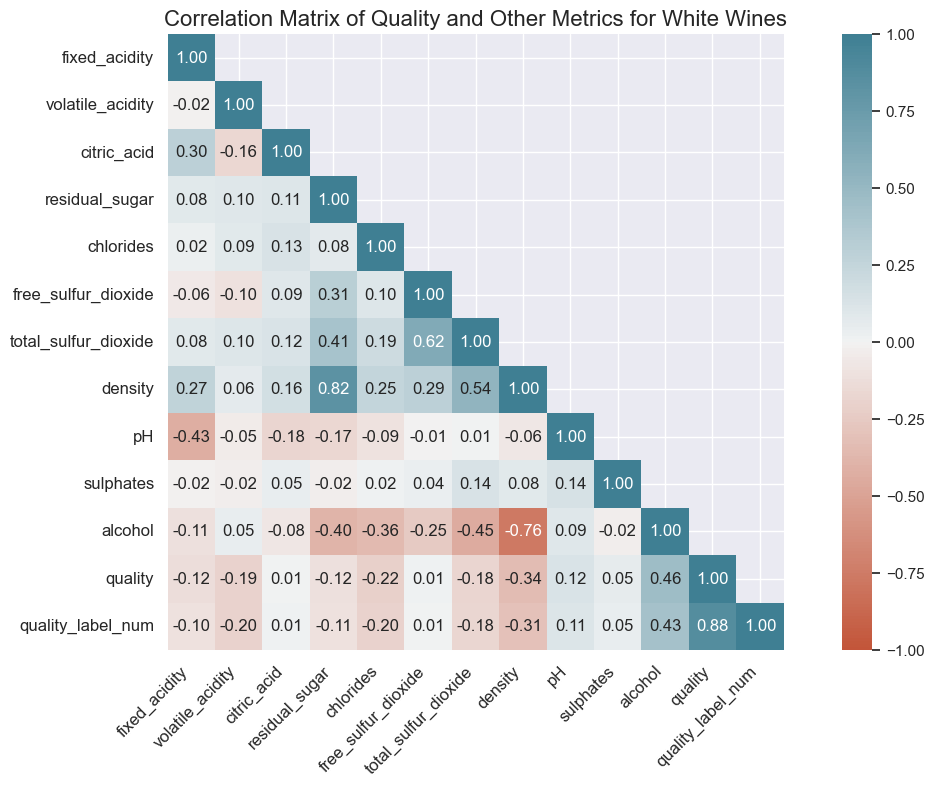

In [34]:
# create a heatmap to check relation between quality and all other metrics for white wines

# Compute the correlation matrix

corr = df_white.corr(numeric_only=True)

# Create a mask for the upper triangle

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set the figure size and plot the heatmap with the mask

sns.set_theme(rc={'figure.figsize': (15, 8)})
ax = sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap=sns.diverging_palette(20, 220, n=200), square=True)

# Customize the tick labels and title

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlation Matrix of Quality and Other Metrics for White Wines', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

* Features with the highest correlation with quality for white wines: alcohol, density, chlorides, volatile acidity and total_sulfur_dioxide.
* As alcohol and density are highly correlated within each other, we will choose the higher value alcohol.  

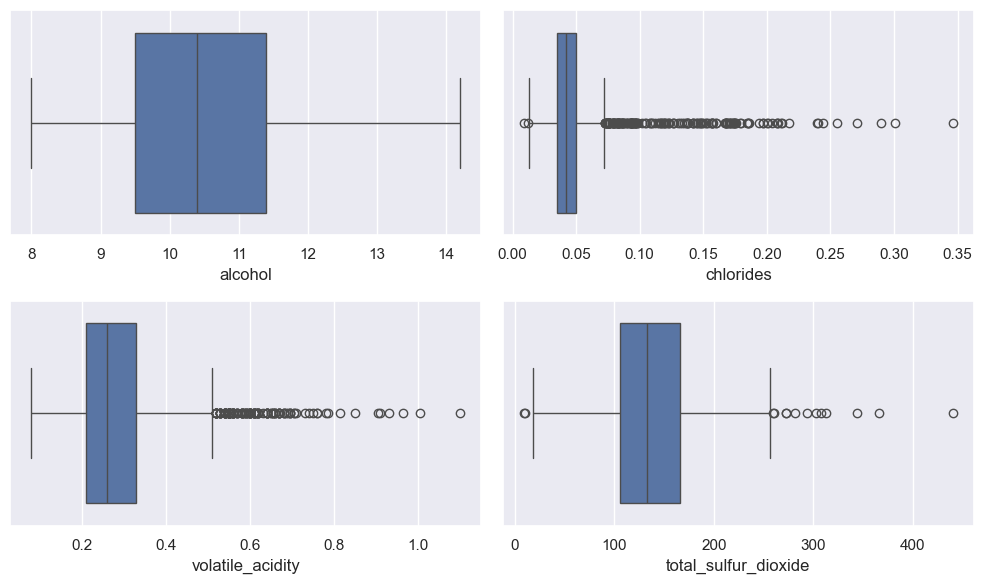

In [35]:
# Selected features for white wines (excluding density)
features = ['alcohol','chlorides','volatile_acidity','total_sulfur_dioxide']

plt.figure(figsize=(10, 6))  # Adjusted figure size for side-by-side plots

# Loop through each feature and create a boxplot
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(x=df_white[feature])  
    plt.xlabel(feature)    

plt.tight_layout() 
plt.show()

In [36]:
df_white['volatile_acidity'].skew()

1.6410809789536034

In [37]:
df_white['volatile_acidity'].kurtosis()

5.327754000428026

In [38]:
df_white['volatile_acidity'].quantile(0.99)

0.64

In [39]:
df_white['volatile_acidity'].quantile(0.05)

0.15

In [40]:
df_filtered = df_white[df_white['volatile_acidity'] > 0.64]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 13 to 3886
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         39 non-null     float64
 1   volatile_acidity      39 non-null     float64
 2   citric_acid           39 non-null     float64
 3   residual_sugar        39 non-null     float64
 4   chlorides             39 non-null     float64
 5   free_sulfur_dioxide   39 non-null     float64
 6   total_sulfur_dioxide  39 non-null     float64
 7   density               39 non-null     float64
 8   pH                    39 non-null     float64
 9   sulphates             39 non-null     float64
 10  alcohol               39 non-null     float64
 11  quality               39 non-null     int64  
 12  type                  39 non-null     object 
 13  quality_label         39 non-null     object 
 14  quality_label_num     39 non-null     int64  
dtypes: float64(11), int64(2), o

In [41]:
df_filtered.head(50).T

,13,18,151,188,316,576,689,797,877,1051,1185,1244,1562,1623,1638,1747,1793,1989,2003,2011,2191,2208,2294,2483,2543,2594,2886,2916,3023,3145,3159,3261,3339,3703,3752,3753,3790,3865,3886
fixed_acidity,6.2,7.6,6.0,7.2,6.6,6.8,7.3,6.8,8.2,8.0,6.3,7.1,10.0,9.2,9.9,5.3,9.8,6.3,7.5,7.3,6.4,9.6,7.8,8.0,6.6,6.1,6.9,5.9,4.7,6.8,4.8,6.1,5.9,6.7,5.7,5.6,6.4,4.7,6.2
volatile_acidity,0.66,0.67,0.67,0.685,0.905,0.67,0.655,0.705,0.68,0.66,0.67,0.85,0.91,0.71,1.005,0.76,0.93,0.695,0.705,0.815,0.68,0.655,0.965,0.74,0.78,0.68,0.75,0.655,0.67,0.73,0.65,1.1,0.65,0.66,0.695,0.695,0.69,0.785,0.76
citric_acid,0.48,0.14,0.07,0.21,0.19,0.3,0.2,0.25,0.3,0.72,0.48,0.49,0.42,0.23,0.46,0.03,0.45,0.55,0.1,0.09,0.26,0.21,0.6,0.21,0.5,0.52,0.13,0.0,0.09,0.2,0.12,0.16,0.23,0.0,0.06,0.06,0.09,0.0,0.01
residual_sugar,1.2,1.5,1.2,9.5,0.8,13.0,10.2,3.2,2.1,17.55,12.6,8.7,1.6,6.2,1.4,2.7,8.6,12.9,13.0,11.4,3.4,2.0,65.8,4.0,1.5,1.4,6.3,5.6,1.0,6.6,1.1,4.4,5.0,13.0,6.8,6.8,7.6,3.4,3.2
chlorides,0.029,0.074,0.06,0.07,0.048,0.29,0.071,0.048,0.047,0.042,0.052,0.028,0.056,0.042,0.046,0.043,0.052,0.056,0.044,0.044,0.069,0.039,0.074,0.05,0.045,0.037,0.036,0.033,0.02,0.054,0.013,0.033,0.035,0.033,0.042,0.042,0.044,0.036,0.041
free_sulfur_dioxide,29.0,25.0,9.0,33.0,17.0,22.0,28.0,10.0,17.0,62.0,57.0,40.0,34.0,15.0,34.0,27.0,34.0,58.0,44.0,45.0,25.0,21.0,8.0,24.0,30.0,32.0,19.0,8.0,5.0,25.0,4.0,8.0,20.0,32.0,9.0,9.0,34.0,23.0,18.0
total_sulfur_dioxide,75.0,168.0,108.0,172.0,204.0,193.0,212.0,57.0,138.0,233.0,222.0,184.0,181.0,93.0,185.0,93.0,187.0,252.0,214.0,204.0,146.0,120.0,160.0,133.0,133.0,123.0,50.0,31.0,9.0,65.0,10.0,109.0,128.0,75.0,84.0,84.0,144.0,134.0,120.0
density,0.9892,0.9937,0.9931,0.9971,0.9934,0.9984,0.9971,0.996,0.995,0.9999,0.9979,0.9962,0.9968,0.9948,0.9966,0.9932,0.9994,0.99806,0.99741,0.99713,0.99347,0.99188,1.03898,0.99418,0.99104,0.99022,0.99312,0.9936,0.98722,0.99324,0.99246,0.99058,0.99016,0.99551,0.99432,0.99432,0.9948,0.98981,0.99026
pH,3.33,3.05,3.11,3.0,3.34,3.08,2.96,3.36,3.22,2.92,3.17,3.22,3.11,2.89,3.02,3.34,3.12,3.29,3.1,3.15,3.18,3.0,3.39,3.06,3.25,3.24,3.09,3.32,3.3,3.12,3.32,3.35,3.46,3.15,3.44,3.44,3.26,3.53,3.2
sulphates,0.39,0.51,0.35,0.55,0.56,0.67,0.58,0.52,0.71,0.68,0.52,0.36,0.46,0.34,0.49,0.38,0.59,0.49,0.5,0.46,0.4,1.0,0.69,0.38,0.48,0.45,0.25,0.51,0.34,0.28,0.36,0.47,0.48,0.5,0.44,0.44,0.38,0.92,0.94


In [42]:
df_filtered['quality_label'].value_counts()

quality_label
low       26
medium    12
high       1
Name: count, dtype: int64

* The dataset includes samples that have been rated by wine experts, so we aim to retain as many rows as possible.
* However, some features that have a high correlation with wine quality contain extreme outliers, which could negatively impact the performance of the ml model.
* We will define a treshold for the slected features and test ml models with and withour outliers on next steps and compare the results 

* volatile acidity is caused by bacterial spoilage, producing acetic acid, which can lead to serious faults in the wine. 
* Legal limits for volatile acidity reach up to 1.2 g/L in white wines and 1.4 g/L in reds 
* source: https://enology.umn.edu/news/volatile-acidity-wine-making 
* In our dataset, values above 0.64 g/L are considered extreme and skew the data, they represent about 1% of the rows. 

In [43]:
# Filter out rows where volatile_acidity is greater than 0.64

df_white_clean = df_white[df_white['volatile_acidity'] <= 0.64]

In [44]:
df_white['alcohol'].skew()

0.4506965980443857

In [45]:
df_white['alcohol'].kurtosis()

-0.6959797180212637

In [46]:
df_white['alcohol'].quantile(0.99)

13.4

In [47]:
df_white['alcohol'].quantile(0.05)

8.9

In [48]:
df_filtered = df_white[df_white['alcohol'] > 13.4]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 589 to 3929
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         35 non-null     float64
 1   volatile_acidity      35 non-null     float64
 2   citric_acid           35 non-null     float64
 3   residual_sugar        35 non-null     float64
 4   chlorides             35 non-null     float64
 5   free_sulfur_dioxide   35 non-null     float64
 6   total_sulfur_dioxide  35 non-null     float64
 7   density               35 non-null     float64
 8   pH                    35 non-null     float64
 9   sulphates             35 non-null     float64
 10  alcohol               35 non-null     float64
 11  quality               35 non-null     int64  
 12  type                  35 non-null     object 
 13  quality_label         35 non-null     object 
 14  quality_label_num     35 non-null     int64  
dtypes: float64(11), int64(2), 

In [49]:
df_filtered['quality_label'].value_counts()

quality_label
medium    31
low        3
high       1
Name: count, dtype: int64

In [50]:
df_white['quality_label'].value_counts()

quality_label
medium    2477
low       1348
high       136
Name: count, dtype: int64

In [51]:
df_filtered.head(100).T

,589,930,1045,1175,1351,2148,2303,2405,2425,2532,2584,2706,2831,2868,2874,2877,2997,3000,3023,3038,3066,3123,3159,3162,3166,3169,3171,3348,3620,3668,3837,3863,3865,3886,3929
fixed_acidity,5.9,5.8,7.1,5.6,5.6,5.4,6.5,7.1,4.9,5.8,5.8,6.3,5.8,7.1,7.7,6.6,5.4,5.3,4.7,6.2,5.0,5.9,4.8,5.0,7.1,4.7,6.4,5.8,5.8,5.4,6.0,5.5,4.7,6.2,6.2
volatile_acidity,0.34,0.29,0.44,0.49,0.41,0.5,0.37,0.36,0.33,0.31,0.39,0.22,0.32,0.36,0.38,0.29,0.3,0.3,0.67,0.2,0.61,0.17,0.65,0.455,0.37,0.455,0.35,0.24,0.61,0.27,0.38,0.62,0.785,0.76,0.355
citric_acid,0.22,0.21,0.37,0.13,0.24,0.13,0.3,0.4,0.31,0.32,0.47,0.34,0.2,0.28,0.23,0.29,0.3,0.3,0.09,0.33,0.12,0.29,0.12,0.18,0.3,0.18,0.28,0.28,0.01,0.22,0.26,0.33,0.0,0.01,0.35
residual_sugar,2.4,2.6,2.7,4.5,1.9,5.0,2.2,1.95,1.2,4.5,7.5,5.0,2.6,2.4,10.8,1.8,1.2,1.2,1.0,5.4,1.3,3.1,1.1,1.9,6.2,1.9,1.6,1.4,8.4,4.6,3.5,1.7,3.4,3.2,2.0
chlorides,0.03,0.025,0.041,0.039,0.034,0.028,0.033,0.033,0.016,0.024,0.027,0.032,0.027,0.036,0.03,0.036,0.029,0.029,0.02,0.028,0.009,0.03,0.013,0.036,0.04,0.036,0.037,0.038,0.041,0.022,0.035,0.037,0.036,0.041,0.046
free_sulfur_dioxide,19.0,12.0,35.0,17.0,10.0,12.0,39.0,26.0,39.0,28.0,12.0,36.0,17.0,35.0,28.0,38.0,25.0,25.0,5.0,21.0,65.0,32.0,4.0,33.0,49.0,33.0,31.0,40.0,31.0,29.0,38.0,24.0,23.0,18.0,31.0
total_sulfur_dioxide,135.0,120.0,128.0,116.0,53.0,107.0,107.0,118.0,150.0,94.0,88.0,93.0,123.0,115.0,95.0,102.0,93.0,93.0,9.0,75.0,100.0,123.0,10.0,106.0,139.0,106.0,113.0,76.0,104.0,107.0,111.0,118.0,134.0,120.0,95.0
density,0.9894,0.9894,0.9896,0.9907,0.98815,0.99079,0.98894,0.98934,0.98713,0.98906,0.9907,0.99012,0.98936,0.98936,0.99164,0.98819,0.98742,0.98742,0.98722,0.99012,0.9874,0.98913,0.99246,0.98746,0.99021,0.98746,0.98779,0.98711,0.9909,0.98889,0.98872,0.98758,0.98981,0.99026,0.98822
pH,3.41,3.39,3.07,3.42,3.32,3.48,3.22,3.2,3.33,3.25,3.38,3.27,3.36,3.19,2.93,3.08,3.31,3.31,3.3,3.36,3.26,3.41,3.32,3.21,3.17,3.21,3.12,3.1,3.26,3.33,3.18,3.15,3.53,3.2,3.06
sulphates,0.78,0.79,0.43,0.9,0.5,0.88,0.53,0.45,0.59,0.52,0.45,0.36,0.78,0.44,0.41,0.42,0.4,0.4,0.34,0.41,0.37,0.33,0.36,0.83,0.27,0.83,0.4,0.29,0.72,0.54,0.47,0.39,0.92,0.94,0.46


* The alcohol content in white wine varies from 5% to 14% source: https://home.binwise.com/blog/wine-alcohol-content
* We will define 13.4% (99th percentile) as the threshold, which corresponds to a normal distribution of quality, and will remove 35 out of 3,950 entries for white wines. 

In [52]:
df_white_clean = df_white_clean[df_white_clean['alcohol'] < 13.4]

In [53]:
df_white['chlorides'].skew()

4.9690763179339195

In [54]:
df_white['chlorides'].kurtosis()

35.530287983648144

In [55]:
df_white['chlorides'].quantile(0.99)

0.1684000000000001

In [56]:
df_filtered = df_white[df_white['chlorides'] > 0.1684]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 34 to 3867
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         40 non-null     float64
 1   volatile_acidity      40 non-null     float64
 2   citric_acid           40 non-null     float64
 3   residual_sugar        40 non-null     float64
 4   chlorides             40 non-null     float64
 5   free_sulfur_dioxide   40 non-null     float64
 6   total_sulfur_dioxide  40 non-null     float64
 7   density               40 non-null     float64
 8   pH                    40 non-null     float64
 9   sulphates             40 non-null     float64
 10  alcohol               40 non-null     float64
 11  quality               40 non-null     int64  
 12  type                  40 non-null     object 
 13  quality_label         40 non-null     object 
 14  quality_label_num     40 non-null     int64  
dtypes: float64(11), int64(2), o

In [57]:
df_filtered['quality_label'].value_counts()

quality_label
low       22
medium    18
Name: count, dtype: int64

In [58]:
df_filtered.head(50).T

,34,35,166,167,168,403,446,503,572,576,615,717,871,982,1028,1076,1347,1382,1545,1570,1616,1617,1693,1816,2234,2235,2348,2692,3121,3187,3215,3364,3464,3465,3496,3594,3614,3788,3866,3867
fixed_acidity,6.7,6.7,6.4,6.4,6.4,6.2,6.4,6.7,6.4,6.8,6.0,6.6,7.9,5.7,8.0,7.0,6.3,7.6,8.0,7.6,6.3,6.3,6.4,6.5,6.6,6.7,7.7,6.6,7.1,6.5,6.8,7.1,6.3,6.4,6.7,7.1,6.3,7.0,6.0,6.0
volatile_acidity,0.23,0.24,0.29,0.3,0.29,0.37,0.18,0.3,0.27,0.67,0.33,0.3,0.64,0.26,0.61,0.39,0.24,0.47,0.55,0.36,0.2,0.22,0.26,0.39,0.26,0.26,0.43,0.2,0.39,0.36,0.37,0.34,0.28,0.29,0.27,0.36,0.29,0.27,0.31,0.32
citric_acid,0.39,0.39,0.44,0.45,0.44,0.3,0.48,0.35,0.32,0.3,0.27,0.3,0.46,0.27,0.38,0.31,0.74,0.49,0.42,0.44,0.58,0.57,0.4,0.81,0.38,0.39,0.37,0.14,0.79,0.36,0.67,0.86,0.3,0.3,0.69,0.2,0.3,0.74,0.32,0.3
residual_sugar,2.5,2.9,3.6,3.5,3.6,6.6,4.0,1.4,4.5,13.0,0.8,4.8,10.6,4.1,12.1,5.3,1.4,13.0,12.6,8.3,1.4,1.4,1.7,1.2,6.5,6.4,10.0,4.4,1.4,6.7,1.5,1.4,6.6,6.5,1.2,1.6,8.1,1.3,7.4,7.3
chlorides,0.172,0.173,0.2,0.197,0.197,0.346,0.186,0.18,0.24,0.29,0.185,0.17,0.244,0.201,0.301,0.169,0.172,0.239,0.211,0.255,0.204,0.208,0.179,0.217,0.17,0.171,0.169,0.184,0.194,0.185,0.175,0.174,0.208,0.209,0.176,0.271,0.212,0.173,0.175,0.174
free_sulfur_dioxide,63.0,63.0,75.0,76.0,75.0,79.0,64.0,36.0,61.0,22.0,12.0,60.0,33.0,73.5,24.0,32.0,24.0,42.0,37.0,28.0,15.0,14.0,5.0,14.0,68.0,64.0,22.0,35.0,23.0,51.5,16.0,36.0,60.0,62.0,36.0,24.0,60.0,34.0,47.0,46.0
total_sulfur_dioxide,158.0,157.0,181.0,180.0,183.0,200.0,150.0,160.0,174.0,193.0,188.0,166.0,227.0,189.5,220.0,162.0,108.0,220.0,213.0,142.0,97.0,96.0,60.0,74.0,201.0,200.0,210.0,168.0,90.0,151.0,98.0,99.0,154.0,156.0,106.0,140.0,150.0,121.0,159.0,159.0
density,0.9937,0.9937,0.9942,0.9942,0.9942,0.9954,0.9945,0.9937,0.9948,0.9984,0.9924,0.9946,0.9983,0.9942,0.9993,0.9965,0.9932,0.9988,0.9988,0.9958,0.9931,0.9932,0.9925,0.9936,0.9956,0.99562,0.99776,0.99396,0.99212,0.99528,0.99244,0.99288,0.99478,0.99478,0.99288,0.99356,0.9958,0.99334,0.9952,0.99519
pH,3.11,3.1,3.02,3.02,3.01,3.29,3.06,3.11,3.12,3.08,3.12,3.18,2.87,3.27,2.94,3.2,3.27,2.96,2.99,3.12,3.16,3.16,3.09,3.08,3.19,3.19,3.02,2.93,3.17,3.17,3.06,2.92,3.1,3.1,2.96,3.11,3.1,3.04,3.19,3.18
sulphates,0.36,0.34,0.41,0.39,0.38,0.58,0.4,0.54,0.48,0.67,0.62,0.47,0.74,0.38,0.48,0.48,0.39,0.51,0.56,0.43,0.43,0.43,0.54,0.53,0.38,0.38,0.64,0.45,0.46,0.42,0.56,0.5,0.4,0.4,0.43,0.63,0.4,0.46,0.5,0.49


* The concentration of chloride varies widely among wines but rarely exceeds 500 mg/L. This concentration reflects the local soil and water conditions.
* We will define the 99th percentile (0.1684) as the threshold for the highest value, which will result in the removal of 40 rows from the entire dataset. 

In [59]:
df_white_clean = df_white_clean[df_white_clean['chlorides'] < 0.1684]

In [60]:
df_white['quality'].mean()

5.854834637717748

In [61]:
df_white_clean['quality'].mean()

5.855801825293351

In [62]:
df_white['quality_label'].value_counts()

quality_label
medium    2477
low       1348
high       136
Name: count, dtype: int64

In [63]:
df_white_clean['quality_label'].value_counts()

quality_label
medium    2406
low       1299
high       130
Name: count, dtype: int64

In [64]:
df_white_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3835 entries, 0 to 3960
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3835 non-null   float64
 1   volatile_acidity      3835 non-null   float64
 2   citric_acid           3835 non-null   float64
 3   residual_sugar        3835 non-null   float64
 4   chlorides             3835 non-null   float64
 5   free_sulfur_dioxide   3835 non-null   float64
 6   total_sulfur_dioxide  3835 non-null   float64
 7   density               3835 non-null   float64
 8   pH                    3835 non-null   float64
 9   sulphates             3835 non-null   float64
 10  alcohol               3835 non-null   float64
 11  quality               3835 non-null   int64  
 12  type                  3835 non-null   object 
 13  quality_label         3835 non-null   object 
 14  quality_label_num     3835 non-null   int64  
dtypes: float64(11), int64(2), 

In [65]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3961 non-null   float64
 1   volatile_acidity      3961 non-null   float64
 2   citric_acid           3961 non-null   float64
 3   residual_sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free_sulfur_dioxide   3961 non-null   float64
 6   total_sulfur_dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
 12  type                  3961 non-null   object 
 13  quality_label         3961 non-null   object 
 14  quality_label_num     3961 non-null   int64  
dtypes: float64(11), int64

* In total, 126 entries removed in cleaned dataset

## 3: Building and Evaluating Supervised Classification Models<a id="3"></a>

In [66]:
from sklearn.feature_selection import f_classif

# Features for each type of wine
features_white = ['alcohol', 'chlorides', 'volatile_acidity']

X_white = df_white[features_white]
y_white = df_white['quality_label']  

In [67]:
# Perform ANOVA for white wines
f_values_white, p_values_white = f_classif(X_white, y_white)
anova_results_white = pd.DataFrame({
    'Feature': features_white,
    'F-Value': f_values_white,
    'P-Value': p_values_white
}).sort_values(by='P-Value')

anova_results_white

,Feature,F-Value,P-Value
0,alcohol,444.121330,9.722633e-175
2,volatile_acidity,107.939581,2.270817e-46
1,chlorides,81.892677,1.414612e-35


* Alcohol content is the most significant predictor of wine quality among the features analyzed, followed by volatile acidity and chlorides.
* The very low p-values for all three features suggest that they are statistically significant, warranting further investigation in modeling efforts to predict wine quality.

#### 1: Logistic Regression

In [68]:
# Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# White wines data and features
features_white = ['alcohol', 'chlorides', 'volatile_acidity']  
X_white = df_white[features_white]
y_white = df_white['quality_label']  

# Step 1: Split white wine data into training and test sets
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.3, random_state=42)

# Step 2: Feature scaling for white wines (Standardizing the data)
scaler_white = StandardScaler()
X_train_white_scaled = scaler_white.fit_transform(X_train_white)
X_test_white_scaled = scaler_white.transform(X_test_white)

# Step 3: Fit the Logistic Regression model for white wines
log_reg_white = LogisticRegression()
log_reg_white.fit(X_train_white_scaled, y_train_white)

# Step 4: Predict and Evaluate the model for white wines
y_pred_white = log_reg_white.predict(X_test_white_scaled)

# Evaluation Metrics for White Wines
print("White Wines - Accuracy:", accuracy_score(y_test_white, y_pred_white))
print("White Wines - Confusion Matrix:\n", confusion_matrix(y_test_white, y_pred_white))
print("White Wines - Classification Report:\n", classification_report(y_test_white, y_pred_white))


White Wines - Accuracy: 0.6947014297729184
White Wines - Confusion Matrix:
 [[  0   2  35]
 [  0 211 201]
 [  0 125 615]]
White Wines - Classification Report:
               precision    recall  f1-score   support

        high       0.00      0.00      0.00        37
         low       0.62      0.51      0.56       412
      medium       0.72      0.83      0.77       740

    accuracy                           0.69      1189
   macro avg       0.45      0.45      0.45      1189
weighted avg       0.67      0.69      0.68      1189



c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Model classified about 69.47% of the test instances correctly which is moderate.
* It struggles significantly with predicting high-quality wines due to class imbalance. 

### Run same model on cleaner white wines dataset

In [69]:
# Cleaned white wines data and features
features_white_clean = ['alcohol', 'chlorides', 'volatile_acidity']  
X_white_clean = df_white_clean[features_white_clean]
y_white_clean = df_white_clean['quality_label']  

# Step 1: Split cleaned white wine data into training and test sets
X_train_white_clean, X_test_white_clean, y_train_white_clean, y_test_white_clean = train_test_split(
    X_white_clean, y_white_clean, test_size=0.3, random_state=42
)

# Step 2: Feature scaling for cleaned white wines (Standardizing the data)
scaler_white_clean = StandardScaler()
X_train_white_clean_scaled = scaler_white_clean.fit_transform(X_train_white_clean)
X_test_white_clean_scaled = scaler_white_clean.transform(X_test_white_clean)

# Step 3: Fit the Logistic Regression model for cleaned white wines
log_reg_white_clean = LogisticRegression()
log_reg_white_clean.fit(X_train_white_clean_scaled, y_train_white_clean)

# Step 4: Predict and Evaluate the model for cleaned white wines
y_pred_white_clean = log_reg_white_clean.predict(X_test_white_clean_scaled)

# Evaluation Metrics for Cleaned White Wines
print("Cleaned White Wines - Accuracy:", accuracy_score(y_test_white_clean, y_pred_white_clean))
print("Cleaned White Wines - Confusion Matrix:\n", confusion_matrix(y_test_white_clean, y_pred_white_clean))
print("Cleaned White Wines - Classification Report:\n", classification_report(y_test_white_clean, y_pred_white_clean))

Cleaned White Wines - Accuracy: 0.7263249348392702
Cleaned White Wines - Confusion Matrix:
 [[  0   3  36]
 [  0 204 162]
 [  0 114 632]]
Cleaned White Wines - Classification Report:
               precision    recall  f1-score   support

        high       0.00      0.00      0.00        39
         low       0.64      0.56      0.59       366
      medium       0.76      0.85      0.80       746

    accuracy                           0.73      1151
   macro avg       0.47      0.47      0.47      1151
weighted avg       0.70      0.73      0.71      1151



c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* The accuracy improved from 69.47% to 72.63% 
* In both cases, the model completely failed to predict high-quality wines
* There is an improvement in all metrics for medium-quality wines

#### 2: Decision Tree

In [70]:
# Libraries
from sklearn.tree import DecisionTreeClassifier 

# Original white wines data and features
features_white = ['alcohol', 'chlorides', 'volatile_acidity']  
X_white = df_white[features_white]
y_white = df_white['quality_label']  

# Step 1: Split original white wine data into training and test sets
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.3, random_state=42)

# Step 2: Feature scaling for original white wines (Standardizing the data)
scaler_white = StandardScaler()
X_train_white_scaled = scaler_white.fit_transform(X_train_white)
X_test_white_scaled = scaler_white.transform(X_test_white)

# Step 3: Fit the Decision Tree model for original white wines
decision_tree_white = DecisionTreeClassifier(random_state=42)
decision_tree_white.fit(X_train_white_scaled, y_train_white)

# Step 4: Predict and Evaluate the model for original white wines
y_pred_white = decision_tree_white.predict(X_test_white_scaled)

# Evaluation Metrics for Original White Wines
print("Original White Wines - Accuracy:", accuracy_score(y_test_white, y_pred_white))
print("Original White Wines - Confusion Matrix:\n", confusion_matrix(y_test_white, y_pred_white))
print("Original White Wines - Classification Report:\n", classification_report(y_test_white, y_pred_white))


Original White Wines - Accuracy: 0.5710681244743482
Original White Wines - Confusion Matrix:
 [[  5   2  30]
 [ 12 188 212]
 [ 46 208 486]]
Original White Wines - Classification Report:
               precision    recall  f1-score   support

        high       0.08      0.14      0.10        37
         low       0.47      0.46      0.46       412
      medium       0.67      0.66      0.66       740

    accuracy                           0.57      1189
   macro avg       0.41      0.42      0.41      1189
weighted avg       0.58      0.57      0.58      1189



### Run same model on cleaner white wines dataset

In [71]:
# Libraries
from sklearn.tree import DecisionTreeClassifier 

# Cleaned white wines data and features
features_white = ['alcohol', 'chlorides', 'volatile_acidity']  
X_white = df_white_clean[features_white]
y_white = df_white_clean['quality_label']  

# Step 1: Split cleaned white wine data into training and test sets
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.3, random_state=42)

# Step 2: Feature scaling for cleaned white wines (Standardizing the data)
scaler_white = StandardScaler()
X_train_white_scaled = scaler_white.fit_transform(X_train_white)
X_test_white_scaled = scaler_white.transform(X_test_white)

# Step 3: Fit the Decision Tree model for cleaned white wines
decision_tree_white = DecisionTreeClassifier(random_state=42)
decision_tree_white.fit(X_train_white_scaled, y_train_white)

# Step 4: Predict and Evaluate the model for cleaned white wines
y_pred_white = decision_tree_white.predict(X_test_white_scaled)

# Evaluation Metrics for Cleaned White Wines
print("Cleaned White Wines - Accuracy:", accuracy_score(y_test_white, y_pred_white))
print("Cleaned White Wines - Confusion Matrix:\n", confusion_matrix(y_test_white, y_pred_white))
print("Cleaned White Wines - Classification Report:\n", classification_report(y_test_white, y_pred_white))


Cleaned White Wines - Accuracy: 0.6029539530842746
Cleaned White Wines - Confusion Matrix:
 [[  2   9  28]
 [  2 205 159]
 [ 40 219 487]]
Cleaned White Wines - Classification Report:
               precision    recall  f1-score   support

        high       0.05      0.05      0.05        39
         low       0.47      0.56      0.51       366
      medium       0.72      0.65      0.69       746

    accuracy                           0.60      1151
   macro avg       0.41      0.42      0.42      1151
weighted avg       0.62      0.60      0.61      1151



In [72]:
# Cleaned white wines data and features
features_white = ['alcohol', 'chlorides', 'volatile_acidity']  
X_white = df_white_clean[features_white]
y_white = df_white_clean['quality_label']  

# Step 1: Split cleaned white wine data into training and test sets
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.3, random_state=42)

# Step 2: Feature scaling for cleaned white wines (Standardizing the data)
scaler_white = StandardScaler()
X_train_white_scaled = scaler_white.fit_transform(X_train_white)
X_test_white_scaled = scaler_white.transform(X_test_white)

# Step 3: Fit the Decision Tree model for cleaned white wines
decision_tree_white = DecisionTreeClassifier(random_state=42)
decision_tree_white.fit(X_train_white_scaled, y_train_white)

# Step 4: Predict and Evaluate the model for cleaned white wines
y_pred_white = decision_tree_white.predict(X_test_white_scaled)

# Evaluation Metrics for Cleaned White Wines
print("Cleaned White Wines - Accuracy:", accuracy_score(y_test_white, y_pred_white))
print("Cleaned White Wines - Confusion Matrix:\n", confusion_matrix(y_test_white, y_pred_white))
print("Cleaned White Wines - Classification Report:\n", classification_report(y_test_white, y_pred_white))

Cleaned White Wines - Accuracy: 0.6029539530842746
Cleaned White Wines - Confusion Matrix:
 [[  2   9  28]
 [  2 205 159]
 [ 40 219 487]]
Cleaned White Wines - Classification Report:
               precision    recall  f1-score   support

        high       0.05      0.05      0.05        39
         low       0.47      0.56      0.51       366
      medium       0.72      0.65      0.69       746

    accuracy                           0.60      1151
   macro avg       0.41      0.42      0.42      1151
weighted avg       0.62      0.60      0.61      1151



#### Decision Tree model has an accuracy of approximately 63% and struggled to correctly predict the "high" quality class.

#### 3: Random Forest

In [73]:
# Libraries
from sklearn.ensemble import RandomForestClassifier 

# Original White wines data and features
features_white = ['alcohol', 'chlorides', 'volatile_acidity']  
X_white = df_white[features_white]
y_white = df_white['quality_label']  

# Step 1: Split Original white wine data into training and test sets
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.3, random_state=42)

# Step 2: Feature scaling for Original white wines (Standardizing the data)
scaler_white = StandardScaler()
X_train_white_scaled = scaler_white.fit_transform(X_train_white)
X_test_white_scaled = scaler_white.transform(X_test_white)

# Step 3: Fit the Random Forest model for Original white wines
random_forest_white = RandomForestClassifier(random_state=42)  # Initialize the Random Forest classifier
random_forest_white.fit(X_train_white_scaled, y_train_white)  # Fit the model to the training data

# Step 4: Predict and Evaluate the model for Original white wines
y_pred_white = random_forest_white.predict(X_test_white_scaled)

# Evaluation Metrics for White Wines
print("Original White Wines - Accuracy:", accuracy_score(y_test_white, y_pred_white))
print("Original White Wines - Confusion Matrix:\n", confusion_matrix(y_test_white, y_pred_white))
print("Original White Wines - Classification Report:\n", classification_report(y_test_white, y_pred_white))

Original White Wines - Accuracy: 0.6644238856181666
Original White Wines - Confusion Matrix:
 [[  0   1  36]
 [  1 215 196]
 [  6 159 575]]
Original White Wines - Classification Report:
               precision    recall  f1-score   support

        high       0.00      0.00      0.00        37
         low       0.57      0.52      0.55       412
      medium       0.71      0.78      0.74       740

    accuracy                           0.66      1189
   macro avg       0.43      0.43      0.43      1189
weighted avg       0.64      0.66      0.65      1189



### Run same model on cleaner white wines dataset

In [74]:
# Cleaned white wines data and features
features_white = ['alcohol', 'chlorides', 'volatile_acidity']  
X_white_clean = df_white_clean[features_white]
y_white_clean = df_white_clean['quality_label']  

# Step 1: Split cleaned white wine data into training and test sets
X_train_white_clean, X_test_white_clean, y_train_white_clean, y_test_white_clean = train_test_split(X_white_clean, y_white_clean, test_size=0.3, random_state=42)

# Step 2: Feature scaling for cleaned white wines (Standardizing the data)
scaler_white_clean = StandardScaler()
X_train_white_clean_scaled = scaler_white_clean.fit_transform(X_train_white_clean)
X_test_white_clean_scaled = scaler_white_clean.transform(X_test_white_clean)

# Step 3: Fit the Random Forest model for cleaned white wines
random_forest_white_clean = RandomForestClassifier(random_state=42)  # Initialize the Random Forest classifier
random_forest_white_clean.fit(X_train_white_clean_scaled, y_train_white_clean)  # Fit the model to the training data

# Step 4: Predict and Evaluate the model for cleaned white wines
y_pred_white_clean = random_forest_white_clean.predict(X_test_white_clean_scaled)

# Evaluation Metrics for Cleaned White Wines
print("Cleaned White Wines - Accuracy:", accuracy_score(y_test_white_clean, y_pred_white_clean))
print("Cleaned White Wines - Confusion Matrix:\n", confusion_matrix(y_test_white_clean, y_pred_white_clean))
print("Cleaned White Wines - Classification Report:\n", classification_report(y_test_white_clean, y_pred_white_clean))

Cleaned White Wines - Accuracy: 0.6924413553431799
Cleaned White Wines - Confusion Matrix:
 [[  1   2  36]
 [  0 215 151]
 [  3 162 581]]
Cleaned White Wines - Classification Report:
               precision    recall  f1-score   support

        high       0.25      0.03      0.05        39
         low       0.57      0.59      0.58       366
      medium       0.76      0.78      0.77       746

    accuracy                           0.69      1151
   macro avg       0.52      0.46      0.46      1151
weighted avg       0.68      0.69      0.68      1151



* The models exhibited varying levels of accuracy, with Logistic Regression achieving the best results overall. 
* However, all models struggled significantly to predict high-quality wines due to the limited number of entries.
* Each model performed better when applied to the dataset where outliers were minimized.

## 4: Balancing Data <a id="4"></a>